# Movie Recommendation System 

In [1]:
import pandas as pd
import os
import warnings

In [2]:
warnings.filterwarnings("ignore")
column_names=["User-id","Movie-id","Ratings","Timestamp"]

In [3]:
df=pd.read_csv(r"D:\PYTHON\Data/u.data",sep="\t",names=column_names)

In [4]:
df.head()

,User-id,Movie-id,Ratings,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
df.shape

(100000, 4)

In [6]:
movie_title=pd.read_csv("D:\PYTHON\Data/u.item",sep='\|', header=None)
movie_title.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
movie_title=movie_title.iloc[:,[0,1]]

In [8]:
movie_title.columns=["Movie-id","Title"]
movie_title.head()


,Movie-id,Title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


#MERGE THE DATAFRAMES

In [9]:
df=pd.merge(df,movie_title,on="Movie-id")
df.tail()

,User-id,Movie-id,Ratings,Timestamp,Title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


#EXPLORATAORY DATA   ANALYSIS

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("dark")

In [11]:
#FINDING AVEERAGE RATING OF THE MOVIES
df.groupby("Title").mean()["Ratings"].sort_values(ascending=False).head()


Title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: Ratings, dtype: float64

In [12]:
df.groupby("Title").count()["Ratings"].sort_values(ascending=False).head()


Title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: Ratings, dtype: int64

In [13]:
movie_ratings=pd.DataFrame(df.groupby("Title").mean()["Ratings"].sort_values(ascending=False))
movie_ratings.head()

,Ratings
Title,
Marlene Dietrich: Shadow and Light (1996),5.0
Prefontaine (1997),5.0
Santa with Muscles (1996),5.0
Star Kid (1997),5.0
Someone Else's America (1995),5.0


In [14]:
movie_ratings["Number of ratings"]=pd.DataFrame(df.groupby("Title").count()["Ratings"])
movie_ratings.sort_values(by="Ratings",ascending=False)
movie_ratings

,Ratings,Number of ratings
Title,,
Marlene Dietrich: Shadow and Light (1996),5.0,1
Prefontaine (1997),5.0,3
Santa with Muscles (1996),5.0,2
Star Kid (1997),5.0,3
Someone Else's America (1995),5.0,1
...,...,...
Touki Bouki (Journey of the Hyena) (1973),1.0,1
JLG/JLG - autoportrait de décembre (1994),1.0,1
Daens (1992),1.0,1


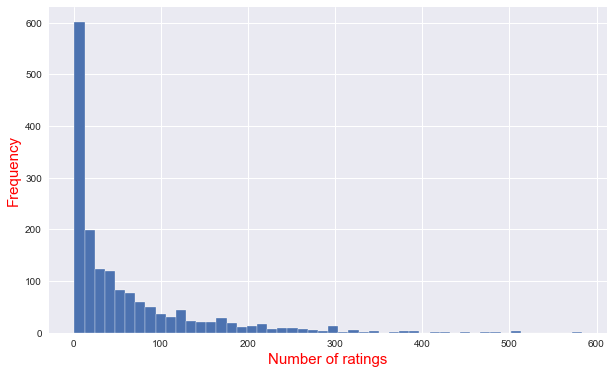

In [15]:
plt.figure(figsize=(10,6))
plt.style.use("seaborn")
plt.hist(movie_ratings["Number of ratings"],50)
plt.xlabel("Number of ratings",color="red",size='15')
plt.ylabel("Frequency",color="red",size='15')
plt.show()

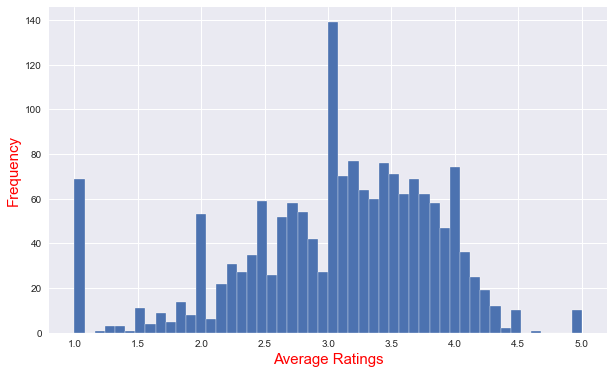

In [16]:
plt.figure(figsize=(10,6))
plt.style.use("seaborn")
plt.hist(movie_ratings["Ratings"],50)
plt.xlabel("Average Ratings",color="red",size='15')
plt.ylabel("Frequency",color="red",size='15')
plt.show()

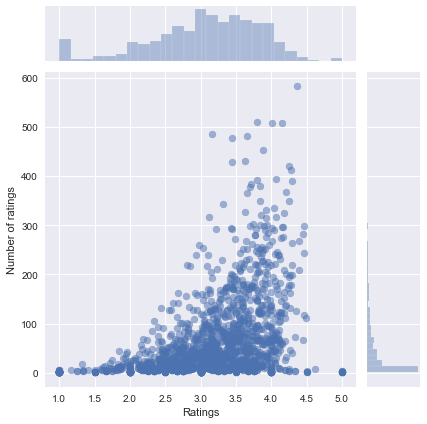

In [17]:
sns.jointplot(x="Ratings",y="Number of ratings",data=movie_ratings,alpha=0.5)
plt.show()

In [18]:
movie_matrix=df.pivot_table(index="User-id",columns="Title",values="Ratings")
movie_matrix.head()

Title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
User-id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [19]:
starwars_user_ratings=movie_matrix["Star Wars (1977)"]
starwars_user_ratings

User-id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [20]:
#correlation of ratings of star wars with other movies in the movie_matrix
similar_to_starwars=movie_matrix.corrwith(starwars_user_ratings)
similar_to_starwars


Title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [21]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=["Correlation"])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
Title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [22]:
corr_starwars=corr_starwars.join(movie_ratings["Number of ratings"])
corr_starwars.head()


,Correlation,Number of ratings
Title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [23]:
corr_starwars[corr_starwars["Number of ratings"]>100].sort_values("Correlation",ascending=False)

,Correlation,Number of ratings
Title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


# PREDICT FUNCTION


In [24]:
def predict_movies(movie_name):
    movie_user_ratings=movie_matrix[movie_name]
    similar_to_movie=movie_matrix.corrwith(movie_user_ratings)
    
    corr_movie=pd.DataFrame(similar_to_movie,columns=["Correlation"])
    corr_movie.dropna(inplace=True)
      
    corr_movie=corr_movie.join(movie_ratings["Number of ratings"])
    prediction=corr_movie[corr_movie["Number of ratings"]>100].sort_values("Correlation",ascending=False)
    
    return prediction

In [ ]:
n=input("Enter the movie name: ")
prediction=predict_movies(n)
prediction.head()